# Pandas (продолжение)

In [1]:
import pandas as pd
import numpy as np

## Упражнение 1

Найдите и выведи индексы пропущенных значений.
Заполните пропущеные значения следующими способами: 

1) Среднимим значения 
2) Медианными значениями 
3) Наиболее часто встечающимися 
4) Линейной интерполяцией 

In [83]:
df = pd.DataFrame({
'ord_no': [70001, np.nan, 70002, 70004, np.nan, 70005, np.nan, 70010, 70003, 70012, np.nan, 70013],
'purch_amt': [150.5, np.nan, 65.26, 110.5, 948.5, np.nan, 5760, 1983.43, np.nan, 250.45, 75.29, 3045.6],
'sale_amt': [10.5, 20.65, np.nan, 11.5, 98.5, np.nan, 57, 19.43, np.nan, 25.45, 75.29, 35.6],
'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
'salesman_id': [5002, 5003, 5001,np.nan, 5002, 5001, 5001,np.nan, 5003, 5002, 5003,np.nan]})
df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,NaN,NaN,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,NaN
4,NaN,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,NaN,NaN,2012-07-27,3001,5001.0
6,NaN,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,NaN
8,70003.0,NaN,NaN,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [104]:
for column in df.columns:
    mask = pd.isnull(df[column])
    print(column, df[mask].index.values)

ord_no [ 1  4  6 10]
purch_amt [1 5 8]
sale_amt [2 5 8]
ord_date [2]
customer_id []
salesman_id [ 3  7 11]


In [100]:
df.fillna(df.mean())

/tmp/ipykernel_4624/634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.00,150.500000,10.500000,2012-10-05,3002,5002.0
1,70006.25,1376.614444,20.650000,2012-09-10,3001,5003.0
2,70002.00,65.260000,39.324444,NaN,3001,5001.0
3,70004.00,110.500000,11.500000,2012-08-17,3003,5002.0
4,70006.25,948.500000,98.500000,2012-09-10,3002,5002.0
5,70005.00,1376.614444,39.324444,2012-07-27,3001,5001.0
6,70006.25,5760.000000,57.000000,2012-09-10,3001,5001.0
7,70010.00,1983.430000,19.430000,2012-10-10,3004,5002.0
8,70003.00,1376.614444,39.324444,2012-10-10,3003,5003.0
9,70012.00,250.450000,25.450000,2012-06-27,3002,5002.0


In [101]:
df.fillna(df.median())

/tmp/ipykernel_4624/2553712938.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median())


,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70004.5,250.45,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,25.45,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5002.0
4,70004.5,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,250.45,25.45,2012-07-27,3001,5001.0
6,70004.5,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5002.0
8,70003.0,250.45,25.45,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [102]:
df.fillna(df.mode().iloc[0])

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70001.0,65.26,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,10.50,2012-09-10,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5001.0
4,70001.0,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,65.26,10.50,2012-07-27,3001,5001.0
6,70001.0,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5001.0
8,70003.0,65.26,10.50,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [103]:
df.fillna(df[['ord_no','purch_amt','sale_amt','customer_id','salesman_id']].interpolate())

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.500,2012-10-05,3002,5002.0
1,70001.5,107.88,20.650,2012-09-10,3001,5003.0
2,70002.0,65.26,16.075,NaN,3001,5001.0
3,70004.0,110.50,11.500,2012-08-17,3003,5001.5
4,70004.5,948.50,98.500,2012-09-10,3002,5002.0
5,70005.0,3354.25,77.750,2012-07-27,3001,5001.0
6,70007.5,5760.00,57.000,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.430,2012-10-10,3004,5002.0
8,70003.0,1116.94,22.440,2012-10-10,3003,5003.0
9,70012.0,250.45,25.450,2012-06-27,3002,5002.0


In [8]:
mask = pd.isnull(df["ord_no"])
df[mask]["ord_no"] = df["ord_no"].mean()
df["ord_no"].fillna(df["ord_no"].mean(), inplace=True)

df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.00,150.50,10.50,2012-10-05,3002,5002.0
1,70006.25,NaN,20.65,2012-09-10,3001,5003.0
2,70002.00,65.26,NaN,NaN,3001,5001.0
3,70004.00,110.50,11.50,2012-08-17,3003,NaN
4,70006.25,948.50,98.50,2012-09-10,3002,5002.0
5,70005.00,NaN,NaN,2012-07-27,3001,5001.0
6,70006.25,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.00,1983.43,19.43,2012-10-10,3004,NaN
8,70003.00,NaN,NaN,2012-10-10,3003,5003.0
9,70012.00,250.45,25.45,2012-06-27,3002,5002.0


## Упражнение 2


DataFrame дан ниже


1. Найдите все алмазы которые по любому линейному размеру больше 5.

2. Создайте новый DataFrame в которому исключены все не чсиловые столбы исходного DataFrame. 

3. Расчитатйте средние значения для каждого столбца

4. Постройте график средних цен для каждой категории (cut) алмазов.

5. Постройте гистрограмму  веса ('carat') алмазов.

6. Посчитаете все пропущенные занчения в Dataframe

7. Создайте новый DataFrame в которому исключены все строки с пропущенными занчениями

8. Узнайте реальное использование оперативной памяти вашим DataFrame

9. Напишите функцию возращающую 20 случайных строчек из DataFrame (без повторений)

In [90]:
import pandas as pd
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

diamonds1 = diamonds[diamonds['x']>5]
diamonds11 = diamonds1[diamonds1['y']>5]
diamonds111 = diamonds11[diamonds11['z']>5]
diamonds111

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [80]:
diamonds.drop(columns=['cut', 'color', 'clarity'])

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [37]:
diamonds.mean()

/tmp/ipykernel_4624/2453091466.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  diamonds.mean()


carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

<AxesSubplot:xlabel='cut'>

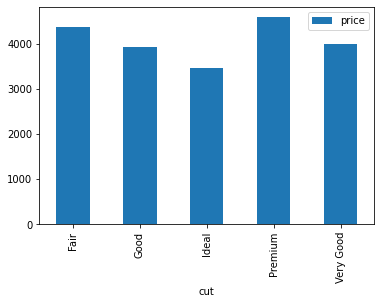

In [63]:
import matplotlib
from matplotlib import pyplot as plt

diamonds4 = diamonds.groupby(["cut"]).agg({"price": "mean"})
diamonds4.plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

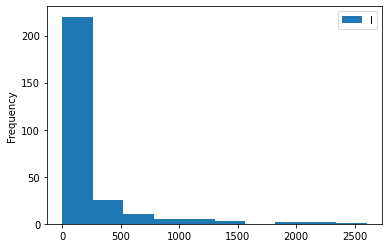

In [81]:
diamonds['l'] = 1
diamonds5 = diamonds.groupby(["carat"]).agg({"l": "sum"})
diamonds5.plot(kind = 'hist')

In [72]:
diamonds.isnull().sum().sum()

0

In [86]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [88]:
diamonds.memory_usage()

Index         128
carat      431520
cut        431520
color      431520
clarity    431520
depth      431520
table      431520
price      431520
x          431520
y          431520
z          431520
dtype: int64

In [99]:
import random

def rand20():
    res = []
    arr = [i for i in range(53941)]

    for i in range(20):
        a = random.choice(arr)
        arr.remove(a)
        res.append(diamonds.iloc[[a]])

    return res

## Упражнение 3
##### ~определенно не баян~ classic

Наконец-то, пришло время взяться за настоящий дата инжениринг и дата саенс. Датасет [титаник](https://www.kaggle.com/c/titanic).

1. Найдите два отдельных распределения по классам и возрастам пассажиров Титаника.
2. Разделите на две возрастные группы такие, что в них входят одинаковое количество пассажиров определенного класса. Определить такие группы для каждого пола (male/female)
3. На основе полученных групп определите доли выживших. (должно получится 12 чисел)
4. Найдите средний возраст выжившего для каждого из полов на основе полного набора данных
5. Найдите несмещенное среднеквадратическое отклонение возраста для выживших
6. Постройте график зависимости доли выживаемости от возроста
7. Постройте куммулятивный график выживаемости в зависимости от возраста для разных полов
8. Определите общие расходы пассажиров
9. Средих всех пассажиров найдите Екатерин (`Kate`, `Katerina`, `Ekaterina` ...)
10. `*`Определите имена для мужчин и женщин, которые чаще остальных встречались на корабле. Выведите список первых пяти.

In [57]:
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
